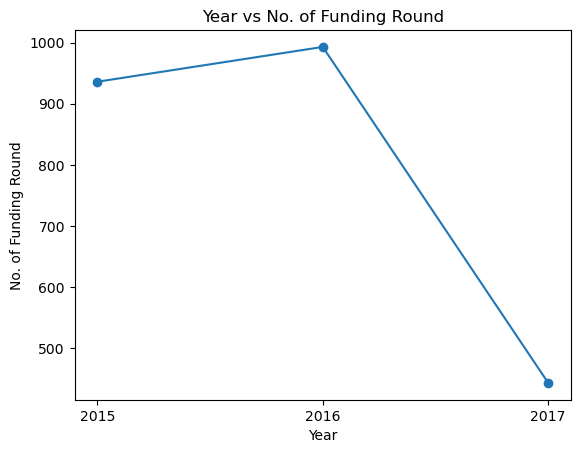

2015 936
2016 993
2017 443


In [19]:
#Print year-wise total number of fundings also. Print years in ascending order.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('C:/Users/gaurav123/Downloads/coading ninja/project 1/startup_funding.csv',encoding='utf-8')
df_start= df.copy()
df_start['Date'].replace("12/05.2015","12/05/2015",inplace=True)
df_start['Date'].replace("13/04.2015","13/04/2015",inplace=True)
df_start['Date'].replace("15/01.2015","15/01/2015",inplace=True)
df_start['Date'].replace("22/01//2015","22/01/2015",inplace=True)
def convertDate(date):
    return date.split('/')[-1]
df_start['Year']=df_start['Date'].apply(convertDate)
year_count=df_start['Year'].value_counts()
year_fund=list(zip(year_count.index,year_count.values))
year_fund=np.array(year_fund,dtype=int)
year_fund=year_fund[year_fund[:,0].argsort()]
year=year_fund[:,0]
funding_round=year_fund[:,1]
plt.plot(year,funding_round,marker = 'o')
plt.xticks(year)
plt.title('Year vs No. of Funding Round')
plt.xlabel('Year')
plt.ylabel('No. of Funding Round')
plt.show()
for i in range(len(year)):
    print(year[i],funding_round[i])

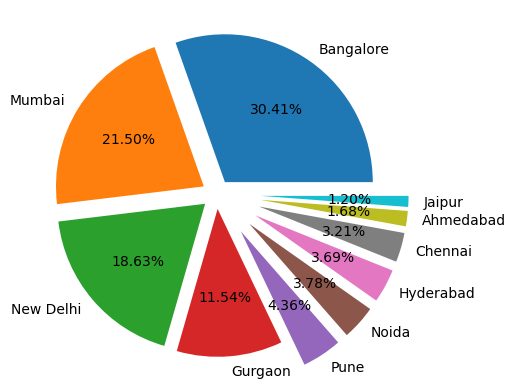

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


In [25]:
#Print the city name and number of startups in that city also.
# Note :
# Take city name "Delhi" as "New Delhi".
# Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore".
# For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also. Indian city name is first.
# Print the city in descending order with respect to the number of startups.
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
file_obj = open("startup_funding.csv", encoding = 'utf-8')
file_data = csv.DictReader(file_obj, skipinitialspace = True)
city = []
for row in file_data:
    city.append(row['CityLocation'])
np_city = np.array(city)
np_city = np_city[np_city != '']
for i in range(len(np_city)):
    if 'bangalore' in np_city[i]:
        np_city[i] = 'Bangalore'
    if np_city[i] == 'Delhi':
        np_city[i] = 'New Delhi'
# print('Delhi' in np_city)
for i in range(len(np_city)):
    np_city[i] = np_city[i].split('/')[0].strip()
dic = {}
for i in np_city:
    if i in dic.keys():
        dic[i] += 1
    else:
        dic[i] = 1
xaxis=[]
yaxis=[]
for i in dic.keys():
    xaxis.append(i)
    yaxis.append(dic[i])
np_xaxis = np.array(xaxis)
np_yaxis = np.array(yaxis)

np_xaxis = np_xaxis[np.argsort(np_yaxis)]
# the above statement sorts the np_xaxis according to the values of np_yaxis. all the top cities came at last.
np_yaxis = np.sort(np_yaxis)
# print(np_yaxis)
np_xaxis = np_xaxis[len(np_xaxis)-1:len(np_xaxis)-1-10:-1]
np_yaxis = np_yaxis[len(np_yaxis)-1:len(np_yaxis)-1-10:-1]
# print(np_yaxis)
plt.pie(np_yaxis, labels = np_xaxis, autopct = '%.2f%%', explode = [0.1, 0.1, 0.1, 0.1, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3])
plt.show()
for i in range(len(np_xaxis)):
    print(np_xaxis[i], np_yaxis[i])

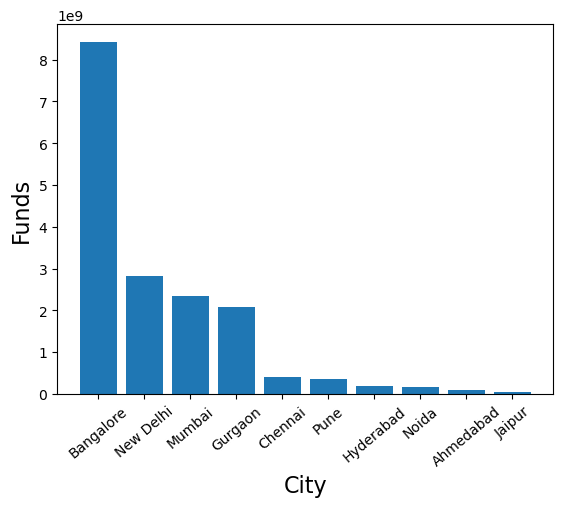

Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


In [24]:
#Print the city and percentage with 2 decimal place after rounding off.
# Note:
# Take city name "Delhi" as "New Delhi".
# Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore".
# For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also. Indian city name is first.
# Print the city in descending order with respect to the percentage of funding.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv("startup_funding.csv")
df = data.copy()
df.drop(df.index[df.CityLocation.isnull()], inplace = True)
df.reset_index(inplace = True, drop = True)
df.loc[df['AmountInUSD'].isnull(), 'AmountInUSD'] = '0'
# we just write the column name inside the .loc function because we want to have changed the nll values inside that column only
# and along a particular index. If we didnt used this it would have given an error.
# print(df.loc[df['AmountInUSD'] == 'New Delhi'])
df.loc[df['CityLocation'] == 'bangalore', 'CityLocation'] = 'Bangalore'
df.loc[df['CityLocation'] == 'Delhi', 'CityLocation'] = 'New Delhi'
city = []
amount = []
for i in df.CityLocation:
    city.append(i)
for j in df.AmountInUSD:
    amount.append(j)
    

for i in range(len(amount)):
    amount[i] = ''.join(amount[i].split(','))
    city[i] = city[i].split('/')[0].strip()
np_amount = np.array(amount, dtype='int64')
np_city = np.array(city)
# print(np_amount)

dic = {}
for i in range(len(np_city)):
    if np_city[i] in dic:
        dic[np_city[i]] += np_amount[i]
    else:
        dic[np_city[i]] = np_amount[i]
# print(dic)    
xaxis = list(dic.keys())
yaxis = list(dic.values())

np_xaxis = np.array(xaxis)
np_yaxis = np.array(yaxis)

np_xaxis = np_xaxis[np.argsort(np_yaxis)]
np_yaxis = np.sort(np_yaxis)

# np_xaxis contains the names of the cities
# np_yaxis contains the amounts corresponding to each city

np_xaxis = np_xaxis[len(np_xaxis)-1:len(np_xaxis)-1-10:-1]
np_yaxis = np_yaxis[len(np_yaxis)-1:len(np_yaxis)-1-10:-1]

plt.bar(np_xaxis, np_yaxis)
plt.xticks(rotation = '40')
plt.xlabel('City', size = 16)
plt.ylabel('Funds', size = 16)
plt.show()

for i in range(len(np_xaxis)):
    print(np_xaxis[i], format((np_yaxis[i]*100)/sum(np_yaxis), '.2f'))

C:\Users\gaurav123\AppData\Local\Temp\ipykernel_11596\3177930418.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.InvestmentType.loc[df.InvestmentType == 'Crowd funding'] = 'Crowd Funding'
C:\Users\gaurav123\AppData\Local\Temp\ipykernel_11596\3177930418.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.InvestmentType.loc[df.InvestmentType == 'PrivateEquity'] = 'Private Equity'
C:\Users\gaurav123\AppData\Local\Temp\ipykernel_11596\3177930418.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/panda

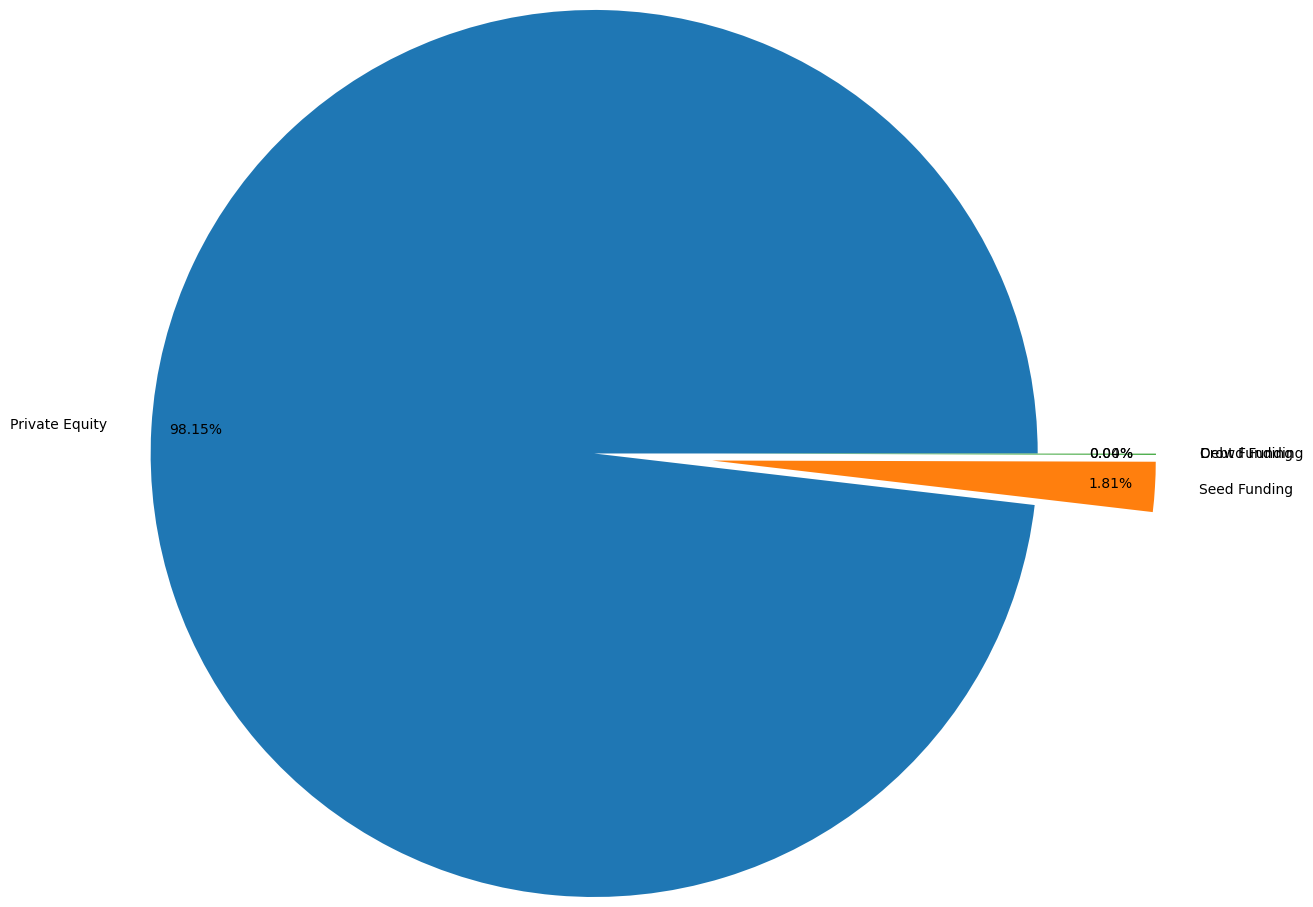

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


In [23]:
#Print the investment type and percentage of amount funded with 2 decimal places after rounding off.
# Note :
# Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.
# Print the investment type in descending order with respect to the percentage of the amount funded.
import numpy as np
import pandas as pd
import csv
original_data = pd.read_csv("startup_funding.csv")
df = original_data.copy()
df.AmountInUSD.fillna('0', inplace = True)
df.InvestmentType.loc[df.InvestmentType == 'Crowd funding'] = 'Crowd Funding'
df.InvestmentType.loc[df.InvestmentType == 'PrivateEquity'] = 'Private Equity'
df.InvestmentType.loc[df.InvestmentType == 'SeedFunding'] = 'Seed Funding'

np_seedfunding = np.array(df.AmountInUSD[df.InvestmentType == 'Seed Funding'])
for i in range(len(np_seedfunding)):
    np_seedfunding[i] = ''.join(np_seedfunding[i].split(','))
np_seedfunding = np.array(np_seedfunding, dtype = 'int64')

np_crowd = np.array(df.AmountInUSD[df.InvestmentType == 'Crowd Funding'])
for i in range(len(np_crowd)):
    np_crowd[i] = ''.join(np_crowd[i].split(','))
np_crowd = np.array(np_crowd, dtype = 'int64')

np_debt = np.array(df.AmountInUSD[df.InvestmentType == 'Debt Funding'])
for i in range(len(np_debt)):
    np_debt[i] = ''.join(np_debt[i].split(','))
np_debt = np.array(np_debt, dtype = 'int64')

np_equity = np.array(df.AmountInUSD[df.InvestmentType == 'Private Equity'])
for i in range(len(np_equity)):
    np_equity[i] = ''.join(np_equity[i].split(','))
np_equity = np.array(np_equity, dtype = 'int64')

private = sum(np_equity)
crowd = sum(np_crowd)
debt = sum(np_debt)
seed = sum(np_seedfunding)

xaxis = ['Private Equity', 'Seed Funding', 'Debt Funding', 'Crowd Funding']
yaxis = [private, seed, debt, crowd]

plt.pie(yaxis, labels = xaxis, autopct = '%.2f%%', pctdistance = 0.9, radius = 3, explode = [0, 0.8, 0.8, 0.8])
plt.show()

for i in range(len(xaxis)):
    print(xaxis[i], format((yaxis[i])*100/sum(yaxis), '.2f'))

In [18]:
#Print the startup name in descending order with respect to amount of funding.
# Note:
# Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names, ignore correcting all, just handle important ones.
import pandas as pd
import numpy as np 
df_start=pd.read_csv('startup_funding.csv',encoding='utf-8') 
df_start['StartupName'].replace('Olacabs','Ola',inplace=True)
df_start['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df_start['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df_start['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)
df_start['StartupName'].replace('Oyo Rooms','Oyo',inplace=True) 
df_start['StartupName'].replace('Oyorooms','Oyo',inplace=True) 
df_start['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df_start['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
## Converting "AmountInUSD" into numeric format
df_start["AmountInUSD"] = df_start["AmountInUSD"].apply(lambda x: float(str(x).replace(",",""))) 
df_start["AmountInUSD"] = pd.to_numeric(df_start["AmountInUSD"])
start_fund=df_start.groupby('StartupName')['AmountInUSD'].sum().sort_values(ascending=False)[0:5] 
startup=start_fund.index 
for i in startup: 
    print(i)

Paytm
Flipkart
Ola
Snapdeal
Oyo


In [22]:
# Print the industry name and percentage of the amount funded with 2 decimal place after rounding off.
# Note :
# Ecommerce is the right word in IndustryVertical, so correct it.
# Print the industry in descending order with respect to the percentage of the amount funded.
import pandas as pd
import numpy as np

df_start = pd.read_csv('startup_funding.csv', encoding='utf-8')

df_start['IndustryVertical'].replace('eCommerce', 'Ecommerce', inplace=True)
df_start['IndustryVertical'].replace('ECommerce', 'Ecommerce', inplace=True)
df_start['IndustryVertical'].replace('ecommerce', 'Ecommerce', inplace=True)

# Converting "AmountInUSD" into numeric format
df_start["AmountInUSD"] = df_start["AmountInUSD"].apply(lambda x: float(str(x).replace(",", "")))
df_start["AmountInUSD"] = pd.to_numeric(df_start["AmountInUSD"])

industry_amount = df_start.groupby('IndustryVertical')['AmountInUSD'].sum().sort_values(ascending=False)[:5]
industry = industry_amount.index
amountIndustry = industry_amount.values
perIndustry = np.true_divide(amountIndustry, amountIndustry.sum()) * 100

for i in range(len(industry)):
    print(industry[i], format(perIndustry[i], '.2f'))

Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


In [21]:
# Print the startup name in descending order with respect to the number of funding round as integer value.
# Note:
# Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names, ignore correcting all, just handle important ones.
# import pandas as pd
import csv
import matplotlib.pyplot as plt

startup = pd.read_csv("startup_funding.csv")
df = startup.copy()
df.dropna(subset = ["StartupName"],inplace = True)


df["StartupName"] = df["StartupName"].replace(["Ola Cabs","Olacabs"],"Ola")
df["StartupName"] = df["StartupName"].replace("Flipkart.com","Flipkart")
df["StartupName"] = df["StartupName"].replace(["Oyo Rooms","OYO Rooms","OYOfit","Oyorooms"],"Oyo")
df["StartupName"] = df["StartupName"].replace(["Paytm Marketplace"],"Paytm")

no_of_times = df["StartupName"].value_counts()

industry = no_of_times.index
amount = no_of_times.values

for i in range(5):
    print(industry[i],amount[i])

Ola 9
Swiggy 7
Paytm 6
UrbanClap 6
Oyo 6


In [15]:
# Print the investor name and number of times invested as integer value.
# Note:
# In startup, multiple investors might have invested. So consider each investor for that startup.
import pandas as pd
import numpy as np
data_funding = pd.read_csv('startup_funding.csv')
df = data_funding.copy()
df = df[df["InvestorsName"].str.contains("Undisclosed|undisclosed")==False]
df.reset_index(inplace = False,drop = True)

investors = []
for i in np.array(df.InvestorsName):
    splt = i.split(',')
    for i in splt:
        investors.append(i.strip())
dic = {}
for i in investors:
        if i in dic.keys():
            dic[i]+=1
        else:
            dic[i]=1
print(max(dic, key=dic.get), dic[max(dic, key=dic.get)])

Sequoia Capital 64
